# Problem Set 4, due Wednesday, May 3rd, 5:30pm.

## Introduction to the assignment

You will work with Wisconsin Breast Cancer Dataset (WBCD), available at UCI Machine Learning Repos- itory. You can download it from the internet but rather use the 􏰄les wdbc.csv.bz2 and wdbc_doc.txt from canvas (under 􏰄les/data) where I have added the variable names to the data. The 􏰄rst 􏰄le is the csv with variable names, the second one a brief description of the data.

The data includes diagnosis of the tumor with 􏰀M􏰁 meaning cancer (malignant) and 􏰀B􏰁 no cancer (benign), and 10 features, describing physical properties of cell nuclei from biopsy samples. Each feature is represented three times, once for mean, once for standard error, and once for the worst values. Your task is to predict diagnosis based on this data.

## Part 1: Explore the data

### 1.1	Summary Statistics

1. Load the data. You may drop id or just ignore it in the rest of your analysis.
2. Create a summary table where you show means, ranges, and number of missings for each variable. In addition, add correlation between the diagnosis and the corresponding feature. You may include more statistics you consider useful.
3. Graphical exploration. Make a number of scatterplots where you explore the relationship between features and the diagnosis.

Note: you may attempt to display all 435 possible combinations as a scatterplot matrix, but that will most likely be just unreadable. Choose instead a few cases with higher correlation. Avoid overwhelming your reader with tens of similar 􏰄figures.

In [1021]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score
import scipy.stats as stats

In [1022]:
# load it up
df = pd.read_csv('wdbc.csv.bz2')

# this changes the 'diagnosis' column so 'malignant' equals 1
df.drop(['id'], axis=1, inplace=True)
df['diagnosis'] = np.where(df['diagnosis'] == "M", 1, 0)

# this produces summary stats and then reindexes alphabetically,
# keeping only count, mean, and std
summary = df.describe().reindex(sorted(df.columns), axis=1)
summary = summary[0:3]

# this collects the number of null values in a column
summary.loc['null values'] = df.isnull().sum()

# and this creates a dataframe that contains correlation info
# for all the variables
columns = list(df.columns)
cor = [ df['diagnosis'].corr(df[x]) for x in columns ]
cordf = pd.DataFrame(index = columns, data = cor)

# ...combining into a dataframe, transposed for easier reading
display = summary[1:].T
result = display.join(cordf)

#result = .append([summary, cordf])
result.columns = ['mean', 'std', 'null count', 'correlation with diagnosis']

result

,mean,std,null count,correlation with diagnosis
area.mean,654.889104,351.914129,0.0,0.708984
area.se,40.337079,45.491006,0.0,0.548236
area.worst,880.583128,569.356993,0.0,0.733825
compactness.mean,0.104341,0.052813,0.0,0.596534
compactness.se,0.025478,0.017908,0.0,0.292999
compactness.worst,0.254265,0.157336,0.0,0.590998
concavity.mean,0.088799,0.079720,0.0,0.696360
concavity.se,0.031894,0.030186,0.0,0.253730
concavity.worst,0.272188,0.208624,0.0,0.659610
concpoints.mean,0.048919,0.038803,0.0,0.776614


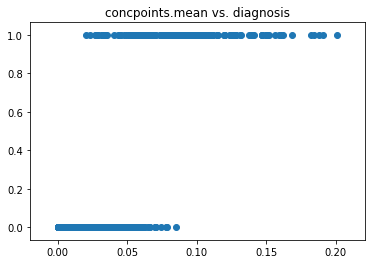

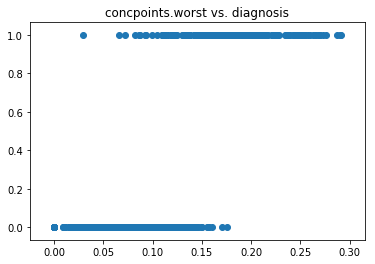

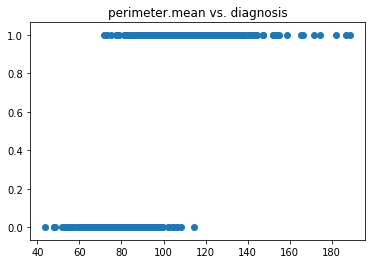

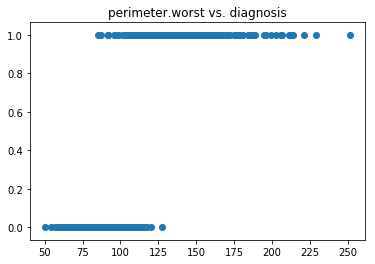

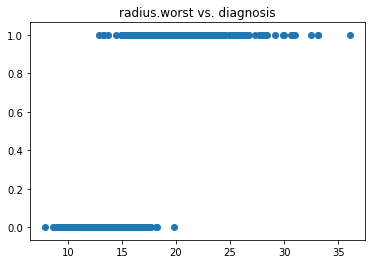

In [1023]:
# it looks like--with the arbitrary cutoff point of .74,
# there are 5 different features we might want to inspect

var = result.index[result['correlation with diagnosis'] > .74].tolist()
var.remove('diagnosis')
var

plt.scatter(df['concpoints.mean'], df.diagnosis)
plt.title('concpoints.mean vs. diagnosis')
plt.show()

plt.scatter(df['concpoints.worst'], df.diagnosis)
plt.title('concpoints.worst vs. diagnosis')
plt.show()

plt.scatter(df['perimeter.mean'], df.diagnosis)
plt.title('perimeter.mean vs. diagnosis')
plt.show()

plt.scatter(df['perimeter.worst'], df.diagnosis)
plt.title('perimeter.worst vs. diagnosis')
plt.show()

plt.scatter(df['radius.worst'], df.diagnosis)
plt.title('radius.worst vs. diagnosis')
plt.show()

### 2 Decision Boundary
The fi􏰄rst task is to plot the decision boundary by kNN and by logistic regression. You will also play a little with feature engineering.
If you are uncertain what is decision boundary, I recommend to consult James et al. (2015) book Section 2. For instance, Figure 2.13 on p38 depicts a 2D classi􏰄cation case where certain X1, X2 values are classi􏰄ed as orange and others as blue. Decision boundary is the dashed winding line that separates these two regions.

There are two broad strategies to plot it. In any case, you have fi􏰄rst to estimate (train) your model. Thereafter you have to predict the classes (cancer/no cancer here) on a regular dense grid that covers the parameter space (this is the small blue/orange dots on fi􏰄gure 2.13). Afterwards you can either plot your predicted values with a certain color code, or alternatively, say, set predicted M = 1 and predicted B = 0, and make a contour plot for a single contour at level 0.5. You may also combine these both methods.
We ignore training/testing/over􏰄tting issues for now.

### 2.1 kNN Case
First, let's explore the decision boundary using kNN.
Pick two features. I recommend to use a few that show relative strong correlation with diagnosis. Feel
free to use a combination you already plotted above.
1. Predict the diagnosis on a grid (say, 100x100) that covers the range of the explanatory variables.
Use kNN with k = 3..7 (pick just one value). This gives you 100x100 predicted diagnoses.
Note: if your features are of very diff􏰃erent scale, you should either scale these into a roughly equal
scale, or use a metric that does this with you. Consult James et al. (2015, p 217).
2. Plot the actual data and the decision boundary on the same plot. Ensure that actual observations
and predictions are clearly distinguishable, and that one can easily understand the color code.
3. Describe your observations. How good is kNN in picking up the actual shape? Does it also pick up noise?
Note: unless you do cross-validation, you cannot know if the model picks up noise (over􏰄t). Here I just ask your best judgement, not any formal analysis.

In [1160]:
# picking two features arbitrarily; they both have pretty
# high correlations to diagnosis and are scaled similarly

X = df[['concpoints.worst', 'perimeter.worst']].values
y = df.diagnosis.values
X_scaled = preprocessing.scale(X)

# specifying number of neighbors and p
n = 3
p = 2

# and then this is the actual model
cancer_knn = KNeighborsClassifier(n_neighbors=n,p=p)
cancer_knn.fit(X_scaled, y)

# borrowed some code to assist in plotting the mesh
# rather than follow the instructions entirely (i.e. 100x100)
# i used a grid that goes from a pretty small value
# to a little bit more than the highest value in the x-columns
x_min, x_max = X_scaled[:, 0].min()-0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = X_scaled[:, 1].min()-0.1, X_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


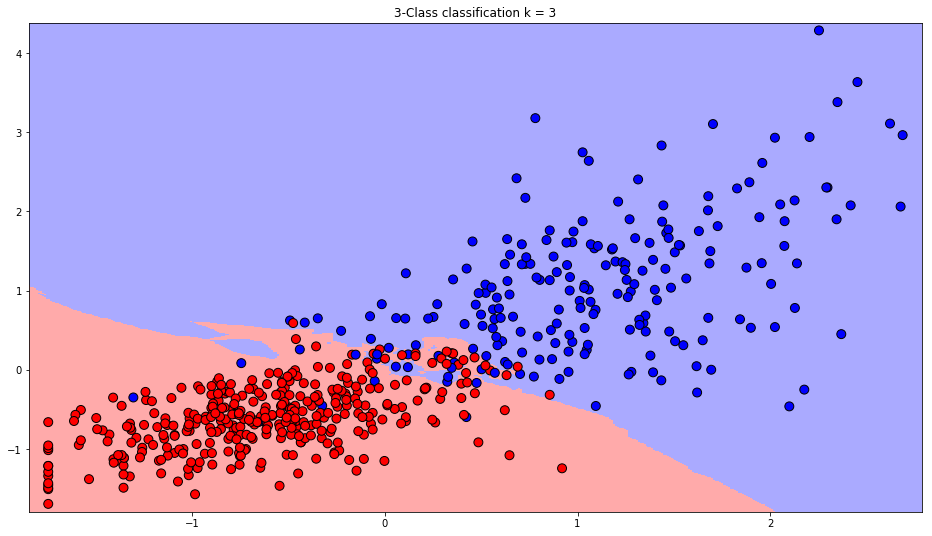

In [1162]:
# and then this is the same color mapping from the lab;
# more borrowed code
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# this line predicts outcomes for our model using the data
# from flattened arrays
Z = cancer_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# we reshape the model's predictions (Z) based on the
# x dimensions of the mesh grid for plotting 
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# and then finally we plot the training points
# i increased the size of the points for better visibility
# but it does result in some points overlapping in the diagnosis
# part of the decision boundary
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=80)

# again here is more of the scaling of the plot itself
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))
plt.show()

cancer_predict = cancer_knn.predict(X_scaled)
#accuracy_score(cancer_predict, y)

*2.1 Describe your observations. How good is kNN in picking up the actual shape? Does it also pick up noise? Note: unless you do cross-validation, you cannot know if the model picks up noise (over􏰄t). Here I just ask your best judgement, not any formal analysis.*

kNN gets quite a bit of the actual shape right, but it's not great. I'd like to see a stronger decision boundary that wraps around the data a little bit better, and fewer noisy areas around (.5, -.5) or (1, -2). I suspect that playing further with the default settings might produce better results (I tried p=2 and k=3 and got what looks like pretty high accuracy though). In addition, with defaults, it seems like there's quite a bit of overfit going on, and despite this, that a handful of the blue points are misclassified.

### 2.2 Logistic Regression
Now repeat the process above by logistic regression. Pick the same features as what you used for k-NN above.
1. Fit a logistic regression model with these two features.
2. Predict the diagnosis on a similar grid. . .
3. . . . and create a similar plot.
4. Describe your observations. How does the result for kNN compare to that for Logistic Regression?

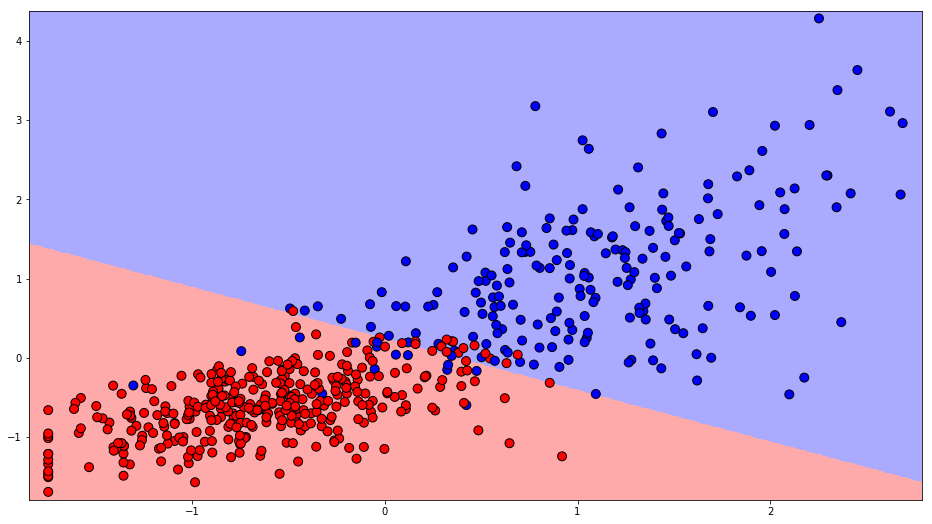

In [1164]:
# this instantiates the model of logistic regression
# and we're using the same features from above
cancer_lr = LogisticRegression()
cancer_lr.fit(X_scaled, y)

# this line predicts outcomes for our model using the data
# from flattened arrays
ZZ = cancer_lr.predict(np.c_[xx.ravel(), yy.ravel()])

# as above, we reshape the model's predictions (ZZ) based on the
# x dimensions of the mesh grid for plotting. we reuse the same
# grid since it's the same features.
zz = ZZ.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, zz, cmap=cmap_light)

# and then finally we plot the training points
# i increased the size of the points for better visibility
# but it does result in some points overlapping in the diagnosis
# part of the decision boundary
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=80)

# again here is more of the scaling of the plot itself
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

cancer_lrpredict = cancer_lr.predict(X_scaled)
#accuracy_score(cancer_lrpredict, y)

*2.2 Discussion: How does the result for kNN compare to that for Logistic Regression?*

The Logistic Regression results are about as accurate than the kNN results, but there is a *much* more straightforward decision boundary in the logistic regression model. That has its upsides and downsides. The upside is that the threshold upon which we are basing our decision is clear. The downside is that many boundary conditions are misclassified (as we see with the misclassified reds and blues on the line). It's not beautiful (it's essentially linear, and--as above--a lot of the blues are misclassified), but we get fairly consistent results. In production, it would probably be better to use this classifier than the knn one above with the parameters we gave it. The knn model looks to overfit, and this doesn't.

### 2.3 Feature Engineering
So far you were using just two of the existing features in the data. However, now let's create a few more.
1. Use these two features to compute some new ones. Let's denote your original features by x and y. Examples you may create include: x2,y2,x·y,1(x > 5),1(y < 1)·x2,logx... You can use all sorts of mathematical operations as long as a) you only use x and y, not other features, and b) the original and the engineered features remain linearly independent (they are, unless you create features like α·x+β·y).
2. Fit a logistic regression model. However, this time pick both x, y, and some of your engineered features.
3. Create the decision boundary plot.
4. Comment on the shape of the boundary. What do you think, how well can you capture the actual boundary? What about over􏰄tting? (Again, I ask about your judgement, not about any formal analysis).
5. Repeat the exercise a few times where you pick/engineer di􏰃erent new features, and try to get as reasonable boundary as you can.
As above, I am asking 􏰀reasonable􏰁 boundary in the sense of your best judgement. No actual cross validation is necessary.
Note: I have mixed experience with scikit-learn.linear_model.LogisticRegression. It occasion- ally appears the default convergence tolerance is far too big, and the default liblinear solver too imprecise. Setting tolerance to 10−12 and solver to lbfgs improved the results for me, but did not make it 􏰅awless.

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


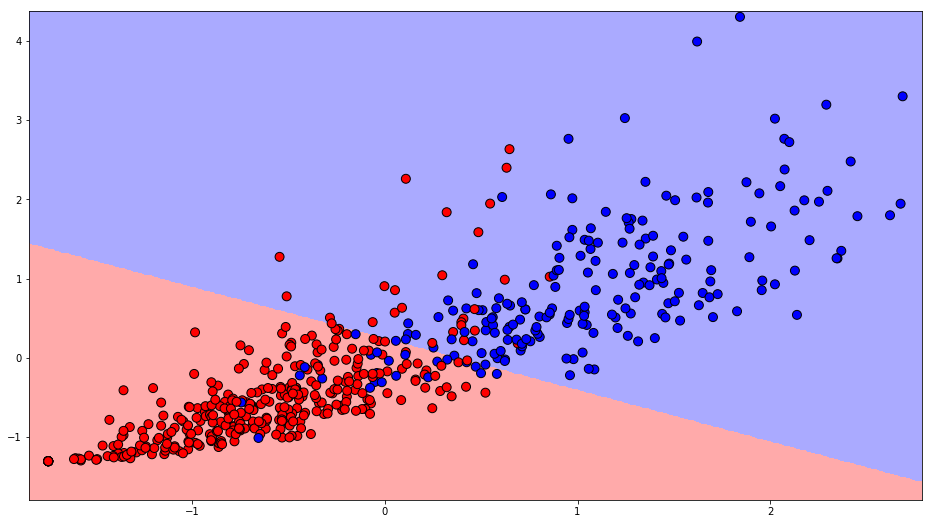

In [1166]:
# let's take the same dataframe from above...
XXX = df[['concpoints.worst', 'concavity.worst']]
# ...and change...
XXX.loc[:, 'newfeature1'] = XXX.loc[:, 'concpoints.worst'] ** 2
# ...some stuff around!
XXX.loc[:, 'newfeature2'] = XXX.loc[:, 'concavity.worst'] ** 2

XXX.loc[:, 'newfeature3'] = XXX.loc[:, 'concpoints.worst'] * XXX.loc[:, 'concavity.worst']

XXX_scaled = preprocessing.scale(XXX.values)

xxxcancer_lr = LogisticRegression(tol=10**(-12), solver = 'lbfgs', C=100000).fit(XXX_scaled, y)

x1 = xx.ravel()
x2 = yy.ravel()
features = np.c_[x1, x2, x1**2, x2**2, x1*x2]

# this line predicts outcomes for our model using the data
# from flattened arrays
ZZZ = xxxcancer_lr.predict(features)

# as above, we reshape the model's predictions (ZZZ) based on the
# x dimensions of the mesh grid for plotting. we reuse the same
# grid since it's the same features.
zzz = ZZZ.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, zz, cmap=cmap_light)

# and then finally we plot the training points
# i increased the size of the points for better visibility
# but it does result in some points overlapping in the diagnosis
# part of the decision boundary
plt.scatter(XXX_scaled[:, 0], XXX_scaled[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=80)

# again here is more of the scaling of the plot itself
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

xxxcancer_lrpredict = xxxcancer_lr.predict(XXX_scaled)
#accuracy_score(xxxcancer_lrpredict, y)

Please ignore the warnings above where Python is yelling at me. It's about data frame slicing, not the plot. :/

With the new features, I think we captured the boundary pretty sufficiently. It doesn't look like there is a significant degree of overfitting, since there's some clear misclassification happening, but there's a pretty solid dividing line. Further, some of the points that were previously classified as non-cancer are now classified as cancer, which is kind of a good thing (we'd rather have false positives than false negatives in this scenario), which means the decision boundary "moved up" a little bit. We'll have to investigate using more features, to see what more information we can get!

### 3 Use the full data
Finally, we'll get serious. We'll use full data set in the logistic regression, include regularization, and cross-validate our results.
### 3.1 Cross Validation
Here your task is to Write code to do n-fold cross validation. Note: I expect you to implement CV here,
not to use any canned version. Consult James et al. (2015, Section 5.1.3). 1. You should do k-fold CV (k 􏰆 10) with the following tasks:
(a) Fit logistic regression model on training data using all existing features. You may also add your engineered features if you wish.
(b) Calculate accuracy, precision and recall on the validation data. 2. Report the average accuracy, precision, and recall over your CV runs.

In [1167]:
def kfold_cross(xdata, ydata, k):
    # parameters: xdata, a dataset to divide
    # ydata, the outcome predictor
    # k, number of divisions
    
    # both xdata and ydata should be the same length
    # but not necessarily the same dimensions
    # if we assume that, we can use:
    index = [ i for i in range(xdata.shape[0]) ]
    
    # then for each i in range k
    for i in range(k):
        itest = index[i::k]
        # we do a set comprehension here 
        itrain = list(set(index).difference(itest))

        x_train = xdata.iloc[itrain]
        x_test = xdata.iloc[itest]
        y_train = ydata[itrain]
        y_test = ydata[itest]
    
    return x_train, x_test, y_train, y_test

In [1168]:
data = df
ydata = df.diagnosis.values
data = data.drop(['diagnosis'], axis=1)


def hbkcv(data, ydata, folds):
    #hbkcv stands for hand-built kfold cross validation :)
    hbkcv_xtrain, hbkcv_xtest, hbkcv_ytrain, hbkcv_ytest = kfold_cross(data, ydata, folds)

    # this instantiates the model of logistic regression
    hbkcv = LogisticRegression(solver='lbfgs', tol=1e-12, C=10000)
    hbkcv_model = hbkcv.fit(hbkcv_xtrain, hbkcv_ytrain)

    # this is the prediction
    hbkcvpredict = hbkcv_model.predict(hbkcv_xtest)

    # precision, accuracy, and recall
    hbkcvaccuracy = accuracy_score(hbkcvpredict, hbkcv_ytest)
    hbkcvrecall = recall_score(hbkcv_ytest, hbkcvpredict)
    hbkcverror = 1 - hbkcvrecall

    # originally i ran this without specifying a parameter for average and got 1
    # which is certainly not accurate unless there's some kind of dramatic
    # overfit happening; in any case...
    hbkcvprec = precision_score(hbkcv_ytest, hbkcvpredict, average='weighted')
    return hbkcverror, hbkcvrecall, hbkcvprec

# getting the average
results = [hbkcv(data, ydata, i) for i in range(3, 11)]
resultsdf = pd.DataFrame(results)
resultsdf.columns = ['error rate', 'recall', 'precision']
print(resultsdf)
resultsdf.mean()

   error rate    recall  precision
0    0.115942  0.884058   0.925672
1    0.163265  0.836735   0.931027
2    0.095238  0.904762   0.966490
3    0.051282  0.948718   0.947212
4    0.062500  0.937500   0.963059
5    0.185185  0.814815   0.918912
6    0.100000  0.900000   0.936508
7    0.095238  0.904762   0.966216


error rate    0.108581
recall        0.891419
precision     0.944387
dtype: float64

I tried running my hbkcv script across all values of k >= 10, and my best results were at k=6 or 7 (see indices 3 or 4 for corresponding values). The mean value for accuracy across all trials was (as you see in the chart) .94; recall was .89; and precision was .94 .

### 3.2 Regularization
Your (almost) last task is to 􏰄nd the best regularization parameter using CV algorithm you created above. Consult James et al. (2015, Section 6.2) for introduction to regularization methods (ridge and lasso). I expect you to play with regularization parameters in existing software, such as scikit-learn.linear_model, not to implement it yourself.
1. Pick a type of regularization (lasso, ridge, elastic net).
2. Create a wide list of regularization parameters. And I mean wide, for instance ranging from 10−6 to 106. Pick a number of values λ inside this range.
3. For each λ in this range, repeat the CV process in exercise 3.1 above. Compute accuracy, precision, recall.
Warning: this may be slow, so I recommend you to start with only a few values. When you algorithm works well, increase the number of values.
4. Report the results as a function of λ. This may be in the form of a table or a graph.
5. Report the best regularization parameters, and the best results.

In [743]:
# let's grab a truncated version of the data from before, as usual...
regularization_xdata = df[:30]
regularization_ydata = df.diagnosis[:30]
regularization_xdata = regularization_xdata.drop(['diagnosis'], axis=1)

# and then skip to number 2, and make a huge list of parameters
params = np.logspace(-6, 6, 20)

def regularizer(x, y, lambdas, penalty, solver):
    # penalty is l2 for ridge and l1 for lasso
    df = pd.DataFrame(index=['error_rate', 'precision', 'recall'])
    #df['features'] = data.columns.values
    #df['features'] = ['accuracy', 'precision', 'recall']
    for i in lambdas:
        cv = kfold_cross(x, y, 10)
        lr = LogisticRegression(solver=solver, tol=1e-12, penalty=penalty, C=1/i)
        model = lr.fit(cv[0], cv[2])
        predict = model.predict(cv[1])
        accuracy = accuracy_score(predict, cv[3])
        recall = recall_score(cv[3], predict, average='weighted')
        precision = precision_score(cv[3], predict, average='weighted')
        error_rate = 1 - accuracy
        column_name = i
        df[column_name] = error_rate, precision, recall
        # i originally had this outputting coefficients of the lr model
    return df

In [746]:
# this is for ridge
# first get a dataframe, then transpose it
ridge = regularizer(data, ydata, params, 'l2', 'lbfgs').T
# and then get the first five values
ridge = ridge.sort_values(by='error_rate', ascending=True).head(6)
ridge

,error_rate,precision,recall
0.000001,0.035714,0.966216,0.964286
0.112884,0.035714,0.966216,0.964286
0.026367,0.035714,0.966216,0.964286
0.000336,0.035714,0.966216,0.964286
0.483293,0.035714,0.966216,0.964286
0.000018,0.035714,0.966216,0.964286


In [748]:
# and this is for lasso; we have to use a different solver
# to get this to work because it doesn't work on the l1 method
# i used liblinear because 'saga' produced all the same results...?

# first get a dataframe, then transpose it
lasso = regularizer(data, ydata, params, 'l1', 'liblinear').T
# and then get the first three values
lasso = lasso.sort_values(by='error_rate', ascending=True).head(6)
lasso

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,error_rate,precision,recall
0.000078,0.000000,1.000000,1.000000
0.000336,0.000000,1.000000,1.000000
0.001438,0.000000,1.000000,1.000000
0.000001,0.017857,0.982955,0.982143
0.000004,0.017857,0.982955,0.982143
0.000018,0.017857,0.982955,0.982143


In [796]:
# and this is for elastic; we have to make a new
# function because it doesnt have the same params
# as the other two :/

def elastic_regularizer(x, y, lambdas):
    df = pd.DataFrame(index=['error_rate', 'precision', 'recall'])
    #df['features'] = data.columns.values
    #df['features'] = ['accuracy', 'precision', 'recall']
    for i in lambdas:
        cv = kfold_cross(x, y, 10)
        # specify a penalty between 0 and 1 to get a mix
        # between l1 and l2 here
        elastic = ElasticNet(tol=1e-6, alpha=i)
        model = elastic.fit(cv[0], cv[2])
        predict = model.predict(cv[1])
        accuracy = accuracy_score(predict.round(), cv[3])
        recall = recall_score(cv[3], predict.round(), average='weighted')
        precision = precision_score(cv[3], predict.round(), average='weighted')
        column_name = i
        error_rate = 1 - accuracy
        df[column_name] = error_rate, precision, recall
    return df


In [797]:
# and output
# first get a dataframe, then transpose it
elastic = elastic_regularizer(data, ydata, params).T
# and then get the first five values
elastic = elastic.sort_values(by='error_rate', ascending=True).head(6)
elastic

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,error_rate,precision,recall
0.000001,0.017857,0.982639,0.982143
0.000004,0.017857,0.982639,0.982143
0.000018,0.017857,0.982639,0.982143
0.000336,0.035714,0.966216,0.964286
0.000078,0.053571,0.950658,0.946429
0.001438,0.053571,0.950658,0.946429


In [752]:
best_ridge_coefficients = ridge.index.tolist()
best_lasso_coefficients = lasso.index.tolist()
best_elastic_coefficients = elastic.index.tolist()

a = set(best_ridge_coefficients)
b = set(best_lasso_coefficients)
c = set(best_elastic_coefficients)
best_coefficients = list(a.intersection(b, c))
inverted_best_coefficients = [ 1/i for i in best_coefficients ]

inverted_best_coefficients

[2976.351441631319, 54555.947811685146, 1000000.0]

After sorting by the error rate, I chose the optimal parameters based on the common coefficients across each model's results. It looks like the optimal lambda values are [0.0003359818286283781, 1.8329807108324375e-05, 1e-06], while the best coefficients are [2976.351441631319, 54555.947811685146, 1000000.0] . I went with 1000000. As previously, please ignore Python being obnoxious. :/

### 4 ROC curve: which estimator is the best
Your last task is to create the ROC curve of several estimators. Consult James et al. (2015, p 148) for what is the ROC curve. You have to compare a) k-NN, b) Naive Bayes, and c) logistic regression estimators. In case of k-NN, you should pick a few di􏰃erent k values (say, 1, 5 and 25). In case of Naive Bayes, you may use use sklearn.naive_bayes.GaussianNB. Feel free to use it 􏰀as is􏰁, no calibration necessary.
1. Split your data into testing and training sets (you may use sklearn.model_selection.train_test_split), say 1/3 for testing. Use all the features in the original data.
2. Using your training data, estimate (a few) k-NN models, Naive Bayes model, and logistic regression. Notes: in case of k-NN, you should use scaled features. In case of logistic regression, use the optimal
regularization parameter value you found in 3.2.
3. For each of the models, predict the probabilites on the test data.
Note: you have to use predict_proba, not predict for logistic and NB regression.
4. Pick a number of thresholds between 0 and 1 (for instance, 0, 0.1, 0.2, ...). For each model and each threshold, treat your predictions to be 1 if it it's probability is at least as big as the threshold.
5. Based on these predictions, compute false positive rate and true positive rate.
6. Plot these rates for each threshold and model.
7. Comment your results. Which model is the best?


In [1169]:
# splitting the data, one last time
final_x = df.drop(['diagnosis'], axis=1)
final_y = df.diagnosis
processed_x = preprocessing.scale(final_x)

In [1170]:
# and this is a useful helper function to work on the knn
# (and other models) prediction outputs.

def threshtest(items, thresh):
    itemlist = []
    for i in items:
        if i >= thresh:
            itemlist.append(1)
        else:
            itemlist.append(0)
    return itemlist

In [1171]:
# K NEAREST NEIGHBORS
#
#
# preprocessing the data, such that features are scaled
k_processed_x = preprocessing.scale(final_x)

# training and testing sets
kx_train, kx_test, \
ky_train, ky_test = train_test_split(k_processed_x, final_y, test_size=.33)

pval = 2

knn1 = KNeighborsClassifier(n_neighbors=1,p=pval).fit(kx_train, ky_train)
knn5 = KNeighborsClassifier(n_neighbors=5,p=pval).fit(kx_train, ky_train)
knn25 = KNeighborsClassifier(n_neighbors=25,p=pval).fit(kx_train, ky_train)

# the output for predict_proba gives us two columns
# containing the prediction for class 0 (benign) and the prediction
# for class 1 (cancerous). 
# we're taking the second column here because we only care about positives
k1prediction = knn1.predict_proba(kx_test)[:,1]
k5prediction = knn5.predict_proba(kx_test)[:,1]
k25prediction = knn25.predict_proba(kx_test)[:,1]

# the output here generates a list of 11 lists (0-1 by .1)
# comparing to see if the threshold is greater than the given value

knncancertest1 = [ threshtest(k1prediction, i * .1) for i in range(11) ]
knncancertest5 = [ threshtest(k5prediction, i * .1) for i in range(11) ]
knncancertest25 = [ threshtest(k25prediction, i * .1) for i in range(11) ]

In [1190]:
# LOGISTIC REGRESSION
#
# I picked the biggest C I could from the list above;
# inverted_best_coefficients[0], if you are curious.

lrx_train, lrx_test, \
lry_train, lry_test = train_test_split(processed_x, final_y, test_size=.33)

lr = LogisticRegression(C=1000000).fit(lrx_train, lry_train)

# the output for predict_proba gives us two columns
# containing the prediction for class 0 (benign) and the prediction
# for class 1 (cancerous)
lrprediction = lr.predict_proba(lrx_test)[:,1]

lrcancer = [ lrprediction[i] for i in range(len(lrprediction)) ]

# the output here generates a list of 11 lists (0-1 by .1)
# starting with 0 and going to 1, comparing to see if the threshold
# is greater than the given value

lrcancertest = [ threshtest(lrcancer, i * .1) for i in range(11) ]

In [1175]:
# GAUSSIAN NAIVE BAYES
#
#

nbx_train, nbx_test, \
nby_train, nby_test = train_test_split(processed_x, final_y, test_size=.33)

nb = GaussianNB()
nbmodel = nb.fit(nbx_train, nby_train)

nbprediction = nb.predict_proba(nbx_test)[:,1]

# the output here generates a list of 11 lists (0-1 by .1)
# starting with 0 and going to 1, comparing to see if the threshold
# is greater than the given value
nbcancertest = [ threshtest(nbprediction, i * .1) for i in range(11) ]

In [1]:
# i borrowed some of this code from an external source but unfortunately
# my browser crashed and i lost it. if i can track it down i will provide
# the citation info... namely, what i got was the mix-in for AUC for the legend
#

def plotfunc(x, y):
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(x, y)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.])
    plt.ylim([-0.1,1.0])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

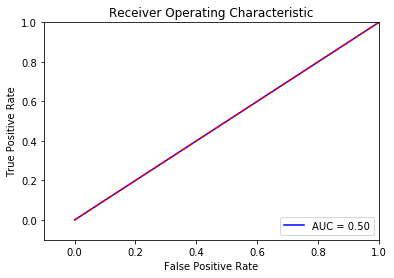

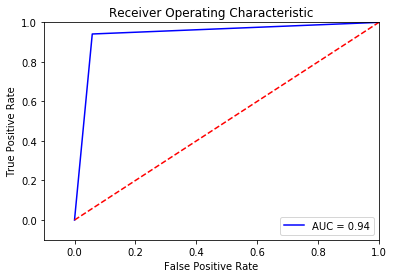

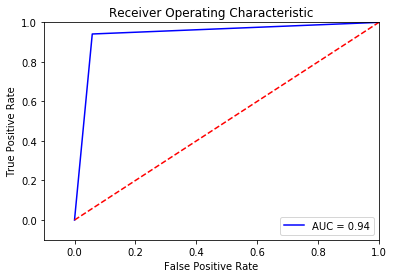

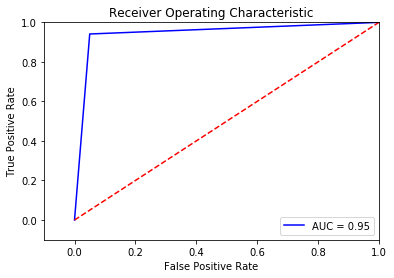

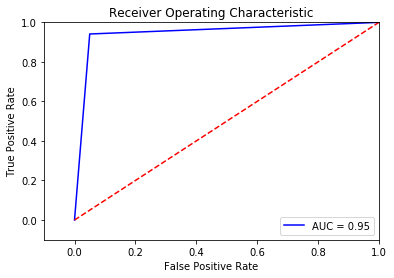

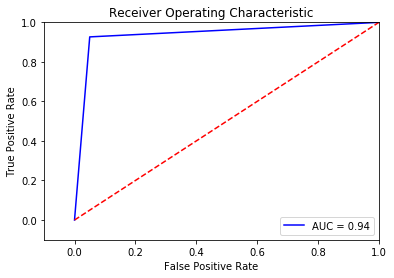

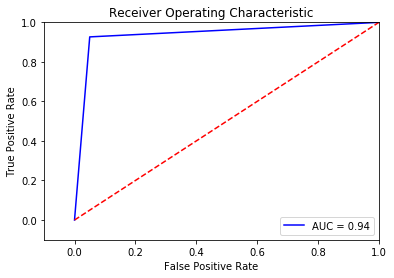

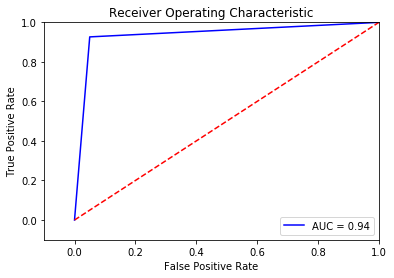

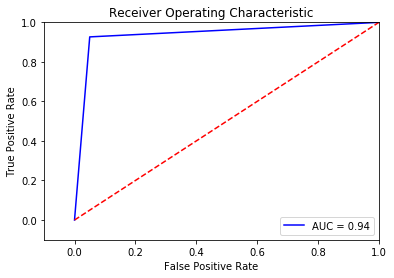

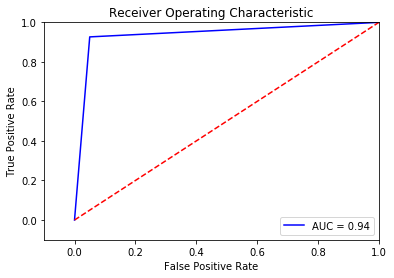

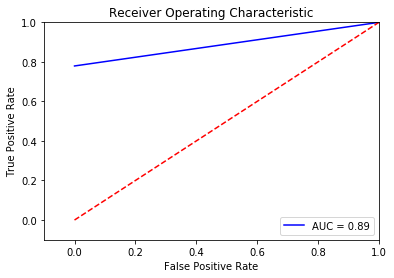

avg aoc: 0.9405773420479302


In [1191]:
naivebayes = [ plotfunc(nby_test, nbcancertest[i]) for i in range(len(nbcancertest))]
print("avg aoc:", np.mean(naivebayes[1:10]))

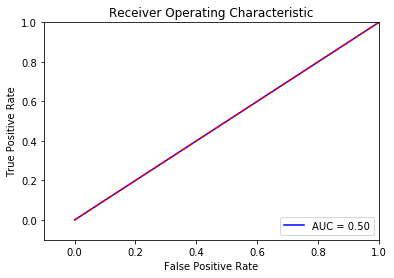

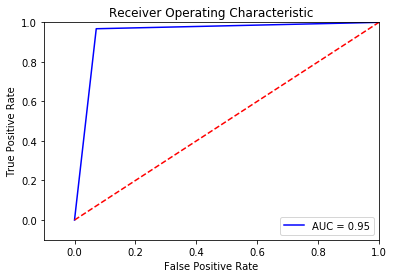

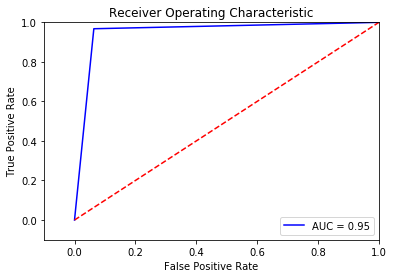

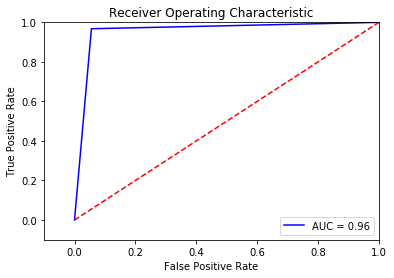

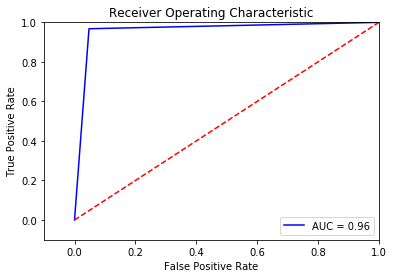

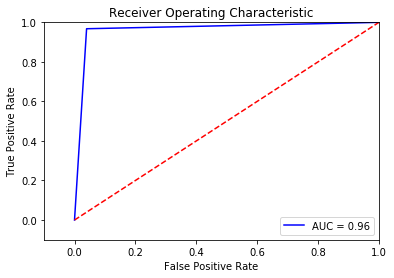

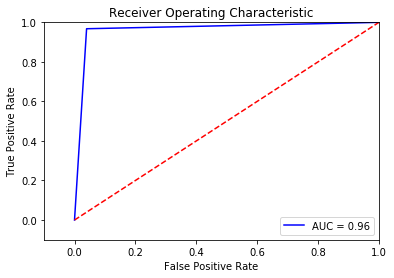

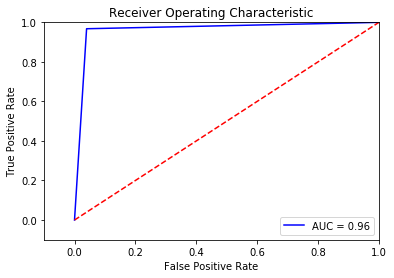

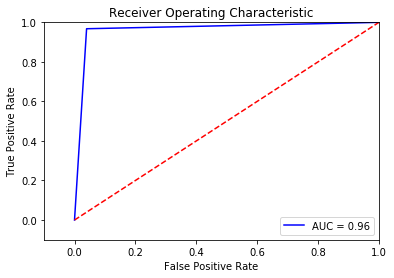

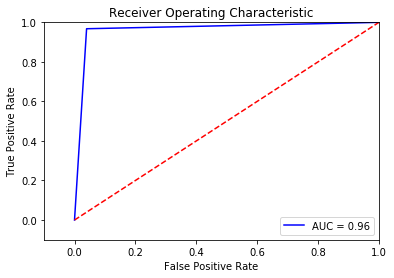

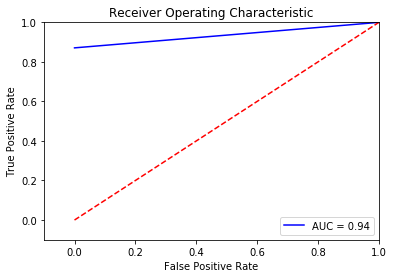

avg aoc: 0.9596205268248279


In [1195]:
logistic = [ plotfunc(lry_test, lrcancertest[i]) for i in range(len(lrcancertest))]
print("avg aoc:", np.mean(logistic[1:10]))

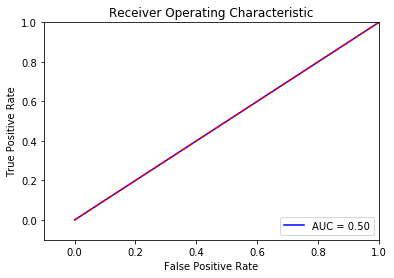

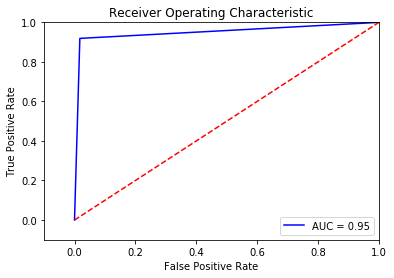

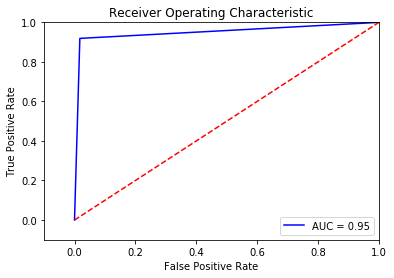

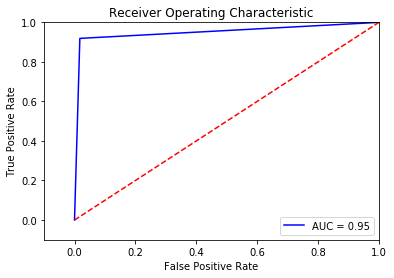

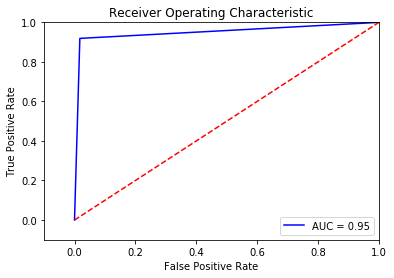

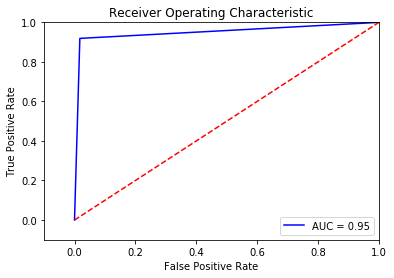

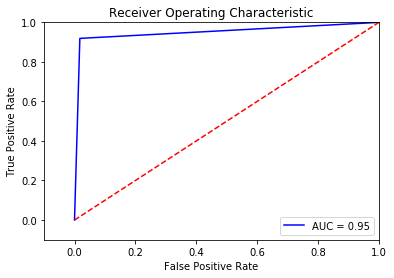

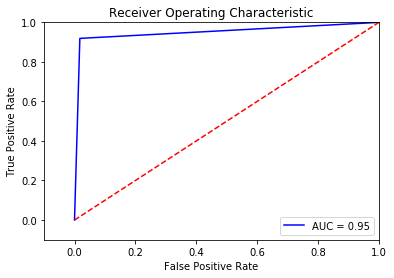

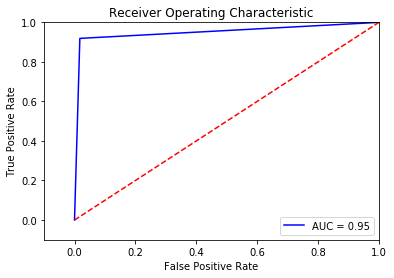

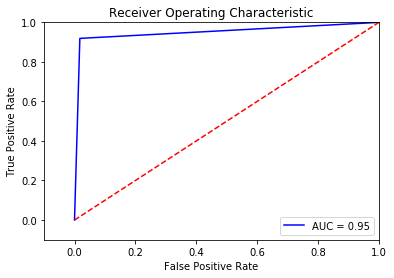

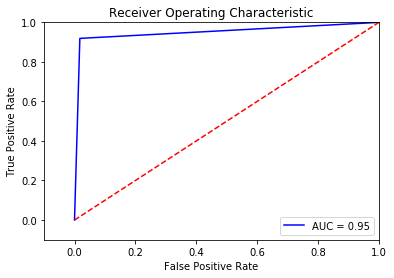

avg aoc: 0.950687529634898


In [1197]:
knnmod1 = [ plotfunc(ky_test, knncancertest1[i]) for i in range(len(knncancertest1))]
print("avg aoc:", np.mean(knnmod1[1:10]))

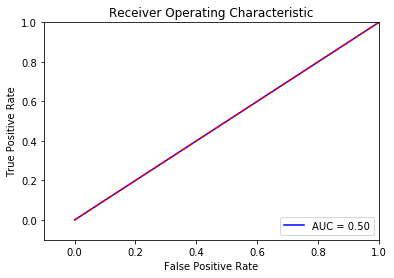

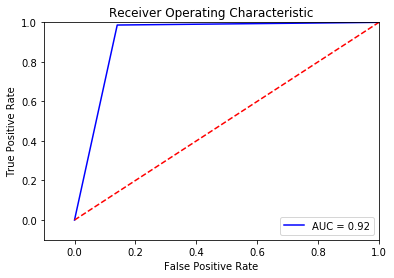

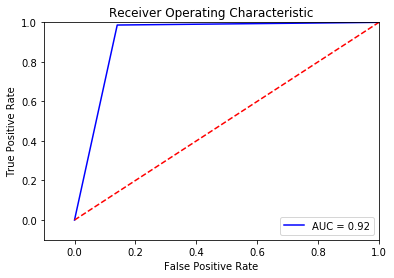

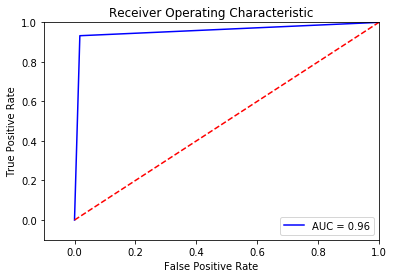

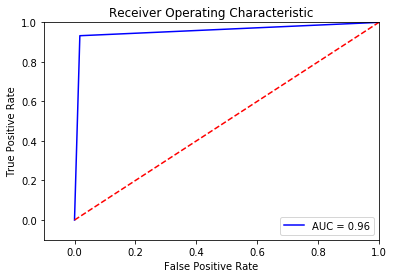

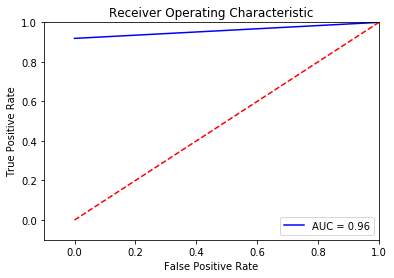

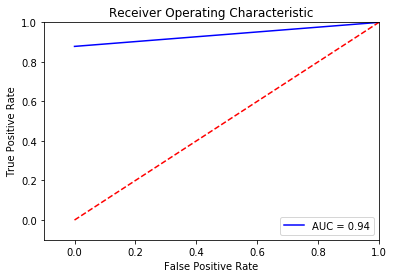

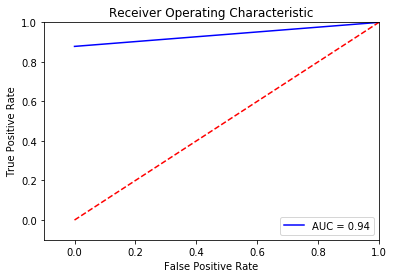

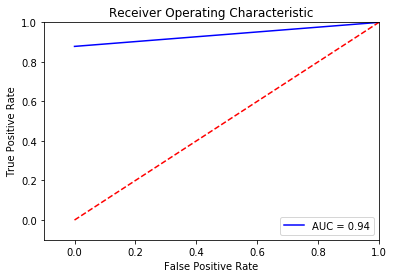

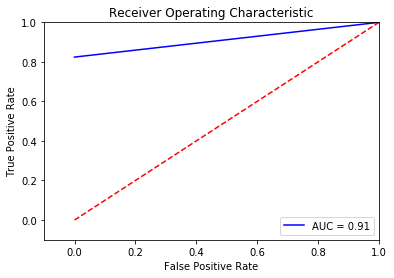

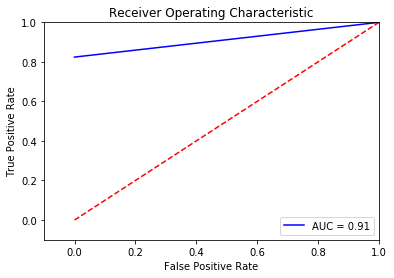

avg aoc: 0.9389125968073336


In [1193]:
knnmod5 = [ plotfunc(ky_test, knncancertest5[i]) for i in range(len(knncancertest1))]
print("avg aoc:", np.mean(knnmod5[1:10]))

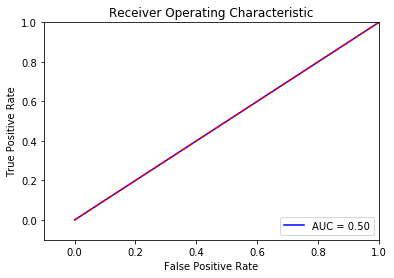

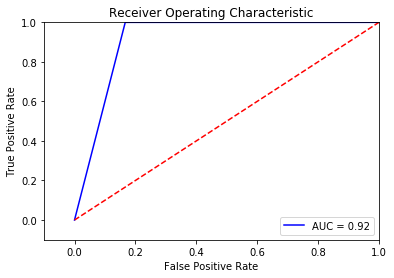

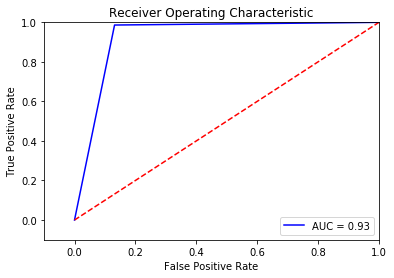

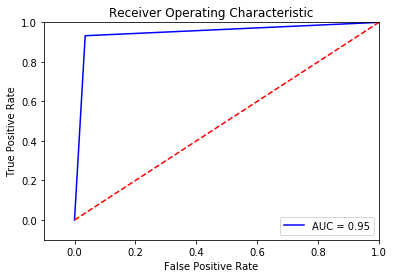

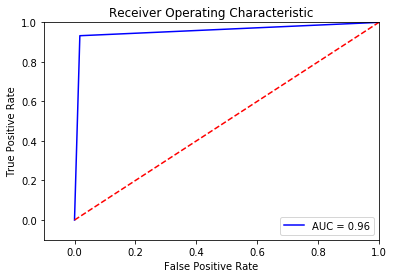

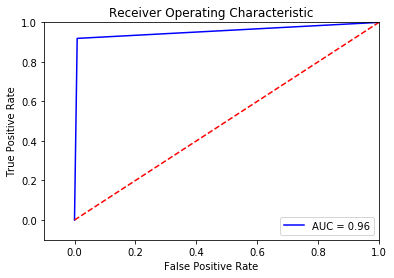

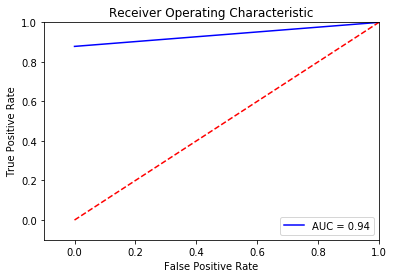

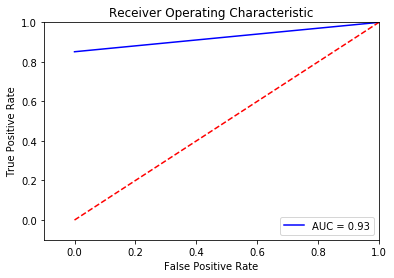

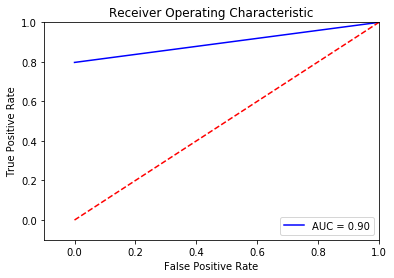

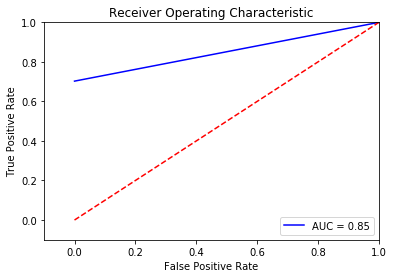

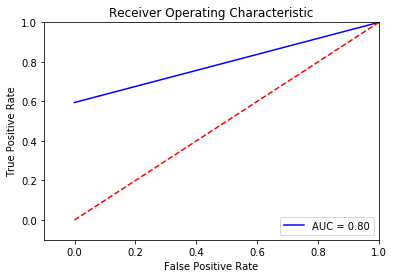

avg aoc: 0.9244639376218324


In [1194]:
knnmod25 = [ plotfunc(ky_test, knncancertest25[i]) for i in range(len(knncancertest1))]
print("avg aoc:", np.mean(knnmod25[1:10]))

I was having trouble plotting all of the ROCs on the same axis, so I hope the preceding list comprehensions will do...

In any case, finding a ROC curve that maximizes area under the curve is effectively the same as minimizing error, since the function is composed of the best specificity and the best sensitivity. As such, if we take an average of the area under the curve for each threshold that we collected above, we can establish which model is the best.

Based on the means I gathered (we'll ignore the first curve since that's super uninformative and is effectively random choice, and the last one becasue it is overfit across all graphs), it looks like most of the models are near-equivalent, coming within range of +/- .02 to each other.

They all yield an average AOC of ~.93 (except knn25, which is at .91). At the onset, logistic regression appears to be the best. However, looking at the graphs for each function we see that the half of the line disappears in the later threshold values--this is because there are no incorrect labelings! As such, I pick the *second-best model, knn1* to be the best, as it points to overfit in fewer cases.

Thanks for the extension, Ott (and Gos). It really helped me get myself in order. :)